<a href="https://colab.research.google.com/github/chrisart10/PuzzleAI/blob/main/skin_cancer/pipeline_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actualizaciones, Metas e Ideas

Actualizaciones
1.   Callback Checkpoint

Metas


1.   Probar otros modelos mediante transferlearning
2.   Implementar K fold cross validation 
3.   Probar un data set (cancer detection)

Ideas


1.   Elemento de lista
2.   Elemento de lista




# Definir dimension de imagen

In [17]:
# Dimensiones de la imagen HxW
input_height = 300
input_weight = 300
#batch
batch_size = 32

# Importar modelos mediante tranfer learning

In [18]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
# !wget --no-check-certificate \
#     https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/resnet_v1_50

  
from tensorflow.keras.applications.resnet50 import ResNet50

# local_weights_file = '/tmp/resnet_v1_50'

pre_trained_model = ResNet50(input_shape = (input_height , input_weight, 3), 
                                include_top = False, 
                                weights = 'imagenet')

#pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer(index=-1)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 10, 10, 2048)


# Ultima capa de aprendizaje

In [19]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(128,kernel_regularizer='l2', activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.5)(x)
# Add a fully connected layer with 1,024 hidden units,kernel_regularization"L2" and ReLU activation
x = layers.Dense(64, kernel_regularizer='l2',activation="relu")(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification -- OUTPUT
x = layers.Dense  (9, activation='softmax')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Rocket science


In [ ]:
#model.summary()

# Abrir dataset desde colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar Dataset desde kaggle

In [ ]:
! pip install -q kaggle

In [8]:
from google.colab import files
files.upload()

# aqui se pone el api key de kaggle 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ratatosck","key":"52f32e7962e9f7b442e92a22796a2a77"}'}

In [9]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# Pegar Api del dataset

API fruits fresh and rotten dataset

In [5]:
#!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

API skin cancer mnist dataset

In [10]:
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

 99% 780M/786M [00:07<00:00, 107MB/s] 
100% 786M/786M [00:07<00:00, 109MB/s]


# Extraer zip

In [11]:
import os
import zipfile

local_zip = '/content/skin-cancer9-classesisic.zip'
# local_zip = "/content/fruits-fresh-and-rotten-for-classification.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

 # Image data preprocessing
[ImageDataPreprocessing Keras Documentation](https://keras.io/api/preprocessing/image/)

[ImageDataPreprocessing TF documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

[Youtube Tutorial](https://youtu.be/q7ZuZ8ZOErE)

# Preparar Dataset y asignar data augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
base_dir = '/tmp/Skin cancer ISIC The International Skin Imaging Collaboration'

train_dir = os.path.join( base_dir, 'Train')
validation_dir = os.path.join( base_dir, 'Test')
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    color_mode="rgb",
                                                    batch_size = batch_size,
                                                    shuffle=True,
                                                    class_mode = 'categorical',
                                                    target_size = (input_height, input_weight))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  valid_datagen.flow_from_directory( validation_dir,
                                                         color_mode="rgb",
                                                         batch_size  = batch_size,
                                                          shuffle=True,
                                                         class_mode  = 'categorical', 
                                                         target_size = (input_height, input_weight))

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [13]:
#info
print(train_generator.class_indices)
print(train_generator.class_mode)
print(train_generator.image_shape)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
categorical
(300, 300, 3)


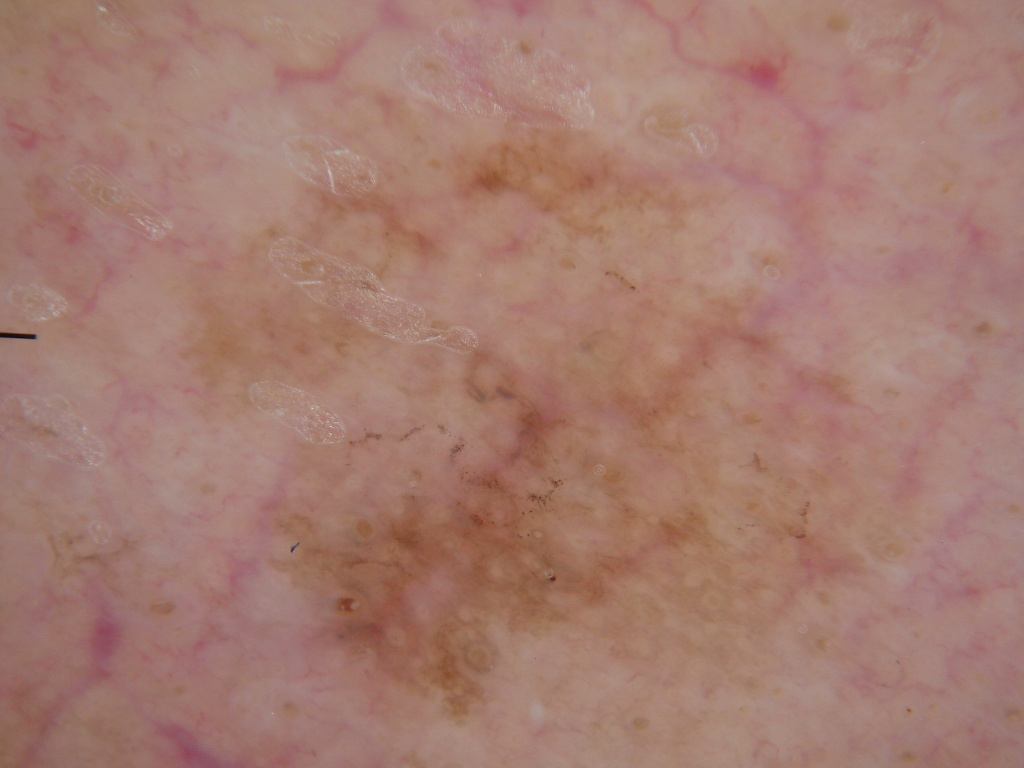

In [ ]:
from PIL import Image
Image.open("/tmp/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg")

# Callbacks API 
[Callbacks Keras Documentation](https://keras.io/api/callbacks)

[Callbacks TF Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks)



# Callback Checkpoint

In [ ]:
# checkpoint_filepath = '/tmp/checkpoint'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

# # Model weights are saved at the end of every epoch, if it's the best seen
# # so far.
# model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])

# #  The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)


# Early stopping


In [14]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') >= 0.98):
                print("\nReached 98% accuracy so cancelling training!")
                self.model.stop_training = True
callbacks = myCallback()

# Entrenar el modelo

In [21]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            # steps_per_epoch = len(X_train)//batch_size,
            epochs = 2,
            callbacks=[callbacks],
            # validation_steps = len(X_test)//batch_size,
            verbose = 1)

Epoch 1/2
32/32 [==============================] - 48s 1s/step - loss: 6.8960 - accuracy: 0.1405 - val_loss: 3.2902 - val_accuracy: 0.1356
Epoch 2/2
32/32 [==============================] - 34s 1s/step - loss: 3.2435 - accuracy: 0.1593


# visualizacion del aprendizaje

ValueError: ignored

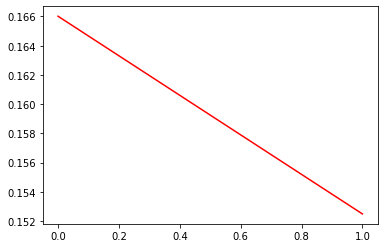

In [22]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()

# Test del modelo 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(input_height, input_weight))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes[0])
  print(np.argmax(classes[0]))
  
  # if classes[0]>0.5:
  #   print(fn + " is a dog")
  # else:
  #   print(fn + " is a cat")

Saving orange.png to orange (4).png
[1. 0. 0. 0. 0. 0.]
0


# Forma de guardar Opcion 1

In [ ]:
import time
path = '/tmp/simple_keras_model'
model.save(saved_model_path)

In [ ]:
new_model = tf.keras.models.load_model('/tmp/saved_models/1612553978/')

# Check its architecture
#new_model.summary()


NameError: ignored

# Forma de guardar opcion 2

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/tmp/saved_models/versions/my_model1.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/tmp/saved_models/versions/my_model1.h5')

# Show the model architecture
#new_model.summary()

NameError: ignored